## **Linear Regression as Machine Learning: Life Expectancy Over Time**


This notebook will go through an example of Linear Regression in a Machine Learning context using publicly available USA life expectancy at birth data.

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# -- set matplotlib defaults, all style sheets: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use("bmh")

In [ ]:
# -- define plotly express defaults
px.defaults.width = 900
px.defaults.template="ggplot2"

In [ ]:
# -- set the filename and read in the data
fname = ""
wbdat = pd.read_csv(fname)
wbdat.head()

,year,leb_us
0,1960,69.770732
1,1961,70.270732
2,1962,70.119512
3,1963,69.917073
4,1964,70.165854


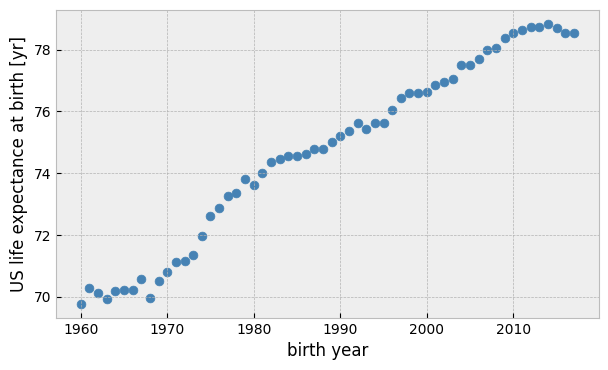

In [ ]:
# -- plot the World Bank data
ax = wbdat.plot("year", "leb_us", kind="scatter", xlabel="birth year",
                ylabel="US life expectance at birth [yr]",
                color="steelblue", s=40, figsize=(7, 4))
# s is the size of the points/ dots on the graph
# figsize???

we want to fit a straight line to the data using *Stochastic Gradient
Descent*, so let's import it from `scikit-learn` (abbreviated as sklearn),

In [ ]:
# -- import scikit-learn's Stochastic Gradient Descent regressor
from sklearn.linear_model import SGDRegressor

In [ ]:
# -- initialize an SGD regression model
lm = SGDRegressor()

In [ ]:
# -- fit the model with the data
lm.fit(wbdat[["year"]], wbdat["leb_us"])

SGDRegressor()

For `sklearn`, independent variables must be in a 2D shape with each independent variable in a column (we'll see why later).  Now let's use the fit to make the model "prediction" for each year,

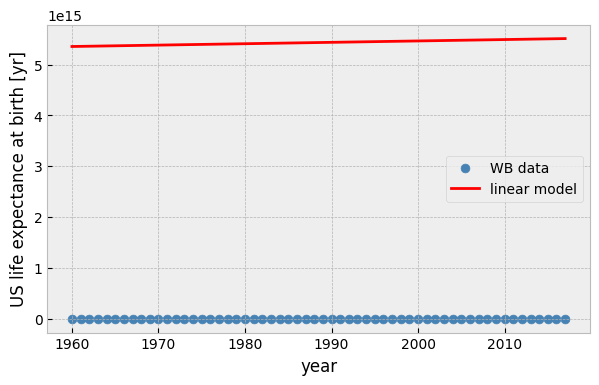

In [ ]:
# -- "predict" the data
model = lm.predict(wbdat[["year"]])

# -- add prediction back to DataFrame
wbdat["model"] = model

# -- plot the data
ax = wbdat.plot("year", "leb_us", kind="scatter", xlabel="birth year",
                ylabel="US life expectance at birth [yr]",
                color="steelblue", label="WB data", s=40, figsize=(7, 4))

# -- add the model line
ax = wbdat.plot("year", "model", label="linear model", color="red", ax=ax)

The raw model fit looks pretty bad...  This is because of a mismatch between the scale of the x and y data and the very low alpha parameter in the model.  We need to **"*standardize*"** the data to put the dimensions on equal footing.

In [ ]:
# -- standardize the data
wbdat["year_st"] = (wbdat["year"] - wbdat["year"].mean())/wbdat["year"].std()
wbdat["leb_us_st"] =(wbdat["leb_us"] - wbdat["leb_us"].mean())/wbdat["leb_us"].std()

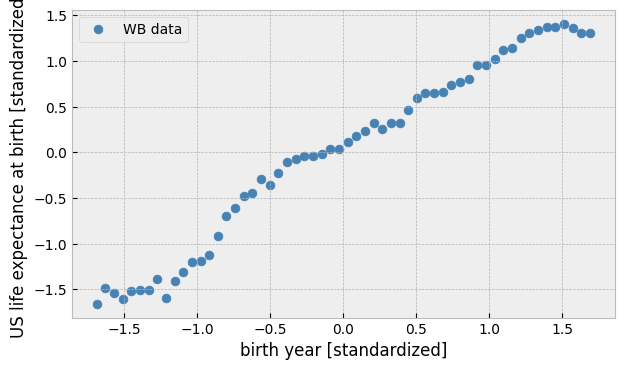

In [ ]:
# -- let's plot the standardized data to see how it worked (notice the limits of the axes now)
ax = wbdat.plot("year_st", "leb_us_st", kind="scatter",
                xlabel="birth year [standardized]",
                ylabel="US life expectance at birth [standardized]",
                color="steelblue", label="WB data", s=40, figsize=(7, 4))

In [ ]:
# -- redefine the the SGD regression model to use with the standardized data
lm_st = SGDRegressor()

In [ ]:
# -- fit the standardized data
lm_st.fit(wbdat[["year_st"]], wbdat["leb_us_st"])

SGDRegressor()

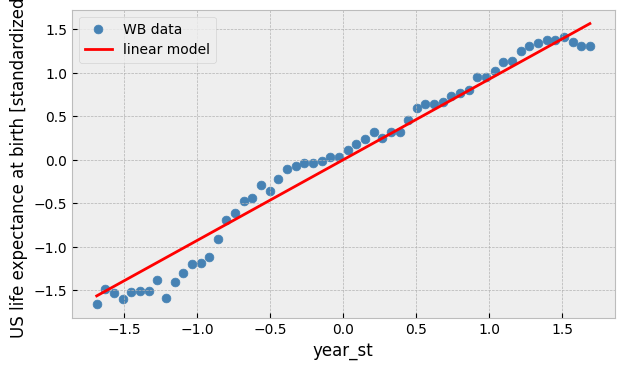

In [ ]:
# -- "predict" the standardized data
model_st = lm_st.predict(wbdat[["year_st"]])
wbdat["model_st"] = model_st

# -- plot the standardized data
ax = wbdat.plot("year_st", "leb_us_st", kind="scatter",
                xlabel="birth year [standardized]",
                ylabel="US life expectance at birth [standardized]",
                color="steelblue", label="WB data", s=40, figsize=(7, 4))

# -- add the model
ax = wbdat.plot("year_st", "model_st", label="linear model", color="red", ax=ax)

But this is against the **standardized** data.  Let's "un-standardize" the model so that it can be compared to the raw data,

In [ ]:
# -- "un-standardize" the model
model = wbdat["leb_us"].std() * model_st +wbdat["leb_us"].mean()
wbdat["model"] = model

In [ ]:
# -- plot the final model

#creating labels dictionary
labs = {"leb_us" : "US Life expectancy at birth [yr]",
        "model" : "linear model"}


fig = px.scatter(wbdat, "year", "leb_us", color_discrete_sequence=["steelblue"], labels=labs)
fig.update_traces(showlegend=True, name = "WBD")
# fig.show()

#make a line plot of the model
figl=px.line(wbdat, "year", "model", labels=labs)
figl.update_traces(showlegend=True, name = "Linear model")
# figl.show()


#adding linear model to the data
fig.add_traces(figl.data)
fig.show()

Let's calculate the mean squared error, MSE $ = \sum (data - model)^2 / N_{data}$,

In [ ]:
# -- calculate MSE
mse = np.mean((wbdat["leb_us"] - wbdat["model"])**2)
print("MSE = {0:0.3}".format(mse))

MSE = 0.232


The most common way to use MSE is to compare it to the variance in the raw data:

In [ ]:
# -- calculate the ratio of MSE to variance
var = np.var(wbdat["leb_us"])
print("MSE/var = {0:0.3}".format(mse / var))

MSE/var = 0.027


Another common measure of goodness of fit (that also doesn't take into account uncertainty in a measurement) is $R^2$ or the *fraction of variance in the data that is explained by the model*,

In [ ]:
# -- calculate R^2
r2 = 1 - np.var(wbdat["leb_us"] - wbdat["model"]) / np.var(wbdat["leb_us"])
print("R^2 = {0:0.2}".format(r2))

R^2 = 0.97


In [ ]:
# -- import scikit-learn's R^2 function
from sklearn.metrics import r2_score

In [ ]:
# -- use sklearn function for R^2
r2 = r2_score(wbdat["leb_us"], wbdat["model"])
print("R^2 = {0:0.2}".format(r2))

R^2 = 0.97
